<a href="https://colab.research.google.com/github/OlhaZahrebelna/python_for_ds_task/blob/main/Zahrebelna_Olha_%22HW_2_1_%D0%9B%D1%96%D0%BD%D1%96%D0%B9%D0%BD%D0%B0_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%96%D1%8F_%D0%B2%D1%96%D0%B4_%D0%B1%D0%B0%D0%B3%D0%B0%D1%82%D1%8C%D0%BE%D1%85_%D0%B7%D0%BC%D1%96%D0%BD%D0%BD%D0%B8%D1%85_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В цьому домашньому завданні ми з вами побудуємо повноцінне ML-рішення реальної ML-задачі. Ви вже маєте всі знання, які для цього потрібні. Дотримуйтесь інструкцій, та користуйтесь матеріалами лекцій, аби виконувати завдання. Тут інструкції будуть детальні, а в подільших завданнях - будуть ставати все менш детальними, аби ви вже починали самостійно структурувати ML-проєкт і до кінця курсу для вас розвʼязати будь-яку ML–задачу було eazy-breezy.

## Dataset

Будемо працювати з набором даних `cars.csv`, який описує автомобілі і їх ціну у індійських рупіях :) Мета - передбачити ціну авто за його характеристиками. Опис набору даних:

| Назва рядка            | Опис                                                                                                                                                 |
|------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------|
| Car_ID                 | Унікальний ідентифікатор для кожного оголошення про автомобіль.                                                                                         |
| Brand                  | Бренд або виробник автомобіля (наприклад, Toyota, Honda, Ford тощо).                                                                                     |
| Model                  | Модель автомобіля (наприклад, Camry, Civic, Mustang тощо).                                                                                               |
| Year                   | Рік виготовлення автомобіля.                                                                                                                            |
| Kilometers_Driven      | Загальний пробіг автомобіля у кілометрах.                                                                                                               |
| Fuel_Type              | Тип палива, який використовує автомобіль (наприклад, бензин, дизель, електро тощо).                                                                      |
| Transmission           | Тип трансмісії автомобіля (наприклад, механічна, автоматична).                                                                                           |
| Owner_Type             | Кількість попередніх власників автомобіля (наприклад, перший, другий, третій).                                                                           |
| Mileage                | Паливна ефективність автомобіля у кілометрах на літр.                                                                                                   |
| Engine                 | Об'єм двигуна автомобіля в кубічних сантиметрах (CC).                                                                                                   |
| Power                  | Максимальна потужність автомобіля в кінських силах (bhp).                                                                                               |
| Seats                  | Кількість місць в автомобілі.                                                                                                                           |
| Price                  | Вартість автомобіля в INR (індійські рупії), що є цільовою змінною для прогнозування.                                                                   |

# Імпорти

Для зручності рекомендую всі імпорти розмістити тут нагорі, аби коли ви перезавантажували ноутбук, одразу можна було в один запуск клітинки імпортувати всі потрібні бібліотеки.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Знайомство з даними

**Завдання 1.** Завантажте набір даних `cars.csv` в pandas.DataFrame. Виведіть перші 5 записів.

In [3]:
df = pd.read_csv('/content/drive/MyDrive/liner regration/cars.csv')
df.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


**Завдання 2.** Виведіть типи даних колонок даних, а також дослідіть, які по факту типи даних мають записи в кожній колонці (тип `object` може містити різні типи даних) і скільки значень є в кожній категоріальній колонці.

Напишіть висновок, скільки в наборі даних числових та категоріальних колонок кожного з трьох різних типів (бінарна, мільтикатегоріальна без порядку, мультикатегоріальна з порядком). Шаблон висновку

```
В наборі даних 10 числових і 10 категоріальних колонок з них
- 2 бінарні (мають лише 2 значення)
- 6 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку
- 2 колонки, в яких можна встановити відношення порядку (наприклад Small<Medium<Large)
```

Якщо не знаєте, як це зробити з `pandas` - ось підказка, які методи можуть допомогти вам виконати це завдання

- pandas.DataFrame.info()
- pandas.DataFrame.dtypes
- pandas.DataFrame.loc[...]
- pandas.DataFrame.select_dtypes(...)
- pandas.Series.unique()
- pandas.Series.nunique()

Детальніше ознайомитись з кожним ви можете в [документації](https://pandas.pydata.org/docs/reference/frame.html), або написати в окремій клітинці знак питання і назву методу (тільки приберіть це перед здачею, бо перегляд документації - не допомагає зрозуміти дані і хід думок, а Ваша робота - це як презентація замовнику зробленої задачі).


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_ID             100 non-null    int64 
 1   Brand              100 non-null    object
 2   Model              100 non-null    object
 3   Year               100 non-null    int64 
 4   Kilometers_Driven  100 non-null    int64 
 5   Fuel_Type          100 non-null    object
 6   Transmission       100 non-null    object
 7   Owner_Type         100 non-null    object
 8   Mileage            100 non-null    int64 
 9   Engine             100 non-null    int64 
 10  Power              100 non-null    int64 
 11  Seats              100 non-null    int64 
 12  Price              100 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 10.3+ KB


In [5]:
list_colums = ['Brand', 'Model','Fuel_Type', 'Transmission', 'Owner_Type']

for i in list_colums:
  print(f'{i} - {df[i].nunique()}')

Brand - 11
Model - 58
Fuel_Type - 2
Transmission - 2
Owner_Type - 3


In [6]:
df['Fuel_Type'].unique()

array(['Petrol', 'Diesel'], dtype=object)

In [7]:
df['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [8]:
df['Owner_Type'].unique()

array(['First', 'Second', 'Third'], dtype=object)

In [9]:
df['Model'].unique()

array(['Corolla', 'Civic', 'Mustang', 'Swift', 'Sonata', 'Nexon',
       'Scorpio', 'Polo', 'A4', 'X1', 'C-Class', 'Endeavour', 'Creta',
       'Harrier', 'Ertiga', 'City', 'Tiguan', 'Q3', '5 Series', 'GLC',
       'Innova', 'Figo', 'Verna', 'Altroz', 'Thar', 'Passat', 'A6', 'X3',
       'E-Class', 'Fortuner', 'Aspire', 'Elantra', 'Safari', 'Vitara',
       'WR-V', 'Ameo', 'A3', '7 Series', 'GLE', 'Yaris', 'Ranger',
       'Santro', 'Tigor', 'S-Cross', 'BR-V', 'T-Roc', 'Q7', 'X5', 'GLA',
       'Camry', 'Venue', 'Tiago', 'XUV300', 'Vento', 'A5', '3 Series',
       'Innova Crysta', 'EcoSport'], dtype=object)

У наборі даних міститься 13 колонок: 8 числових та 5 категоріальних. Усі колонки заповнені повністю — відсутні значення відсутні.

Категоріальні ознаки поділяються на три типи:

Бінарні (2 колонки):
Fuel_Type (Petrol / Diesel) та Transmission (Manual / Automatic) — містять лише два можливих значення.

Мультикатегоріальні без порядку (2 колонки):
Brand (11 значень) та Model (58 значень). Ці ознаки є номінальними, між їхніми значеннями не існує природного порядку.

Мультикатегоріальна з порядком (1 колонка):
Owner_Type (First, Second, Third) — має логічний порядок, тому належить до порядкових (ordinal) ознак.


In [10]:
np.round(df.describe(), 2)

,Car_ID,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00
mean,50.50,2018.39,28150.00,17.21,1855.23,158.13,5.23,1574000.00
std,29.01,1.17,9121.38,3.31,631.31,76.97,0.75,1000264.61
min,1.00,2016.00,10000.00,10.00,999.00,68.00,4.00,450000.00
25%,25.75,2017.75,22000.00,15.00,1462.00,103.00,5.00,700000.00
50%,50.50,2018.00,27000.00,17.00,1774.00,148.00,5.00,1300000.00
75%,75.25,2019.00,32000.00,19.00,2143.00,187.00,5.00,2500000.00
max,100.00,2021.00,60000.00,25.00,4951.00,396.00,7.00,4000000.00


<Axes: >

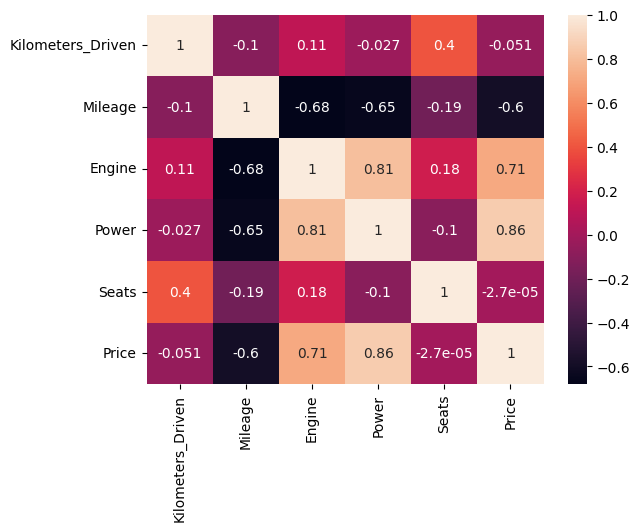

In [11]:
sns.heatmap(df[['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']].corr(), annot=True)

На heatmap видно, що ціна авто (Price) має сильну позитивну кореляцію з показниками Power та Engine. Це означає, що зі збільшенням потужності двигуна та його об’єму, як правило, зростає і ціна автомобіля. Також спостерігається помірна негативна кореляція між Mileage та Price: тобто чим нижча витрата пального/чим менша економічність (нижчий mileage), тим зазвичай вища ціна, що може пояснюватися тим, що потужніші автомобілі часто мають нижчу паливну ефективність, але є дорожчими.
Отже, для побудови моделі прогнозування ціни доцільно включити в модель щонайменше Power, Engine та Mileage, оскільки саме ці ознаки демонструють найбільш помітний лінійний зв’язок із ціною. Додатково варто врахувати, що Engine і Power також сильно корелюють між собою, тому на наступних етапах бажано перевірити модель на мультиколінеарність
, щоб уникнути дублювання інформації.

**Завдання 3**. Розділіть дані на тренувальні і тест. Відведіть в тест 20%, поставте `random_state=12`. Ми будемо передбачати колонку `Price` - тож, вона є цільовою змінною. В результаті у Вас має бути 4 набори даних `X_train, X_test, y_train, y_test`.

Надалі ми всюди тренуємо методи для кодування, масштабування та саму модель тільки на тренувальних даних X_train (та y_train для моделі), а на тестувальних лише використовуємо вже навчені методи для кодування, масштабування і модель викликаючи в них `transform()` (для методів обробки даних) або `predict()` (для моделі).

І так само треба робити завжди.

In [12]:
X = df.drop(['Price', 'Car_ID'], axis=1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (80, 11)
X_test shape: (20, 11)
y_train shape: (80,)
y_test shape: (20,)


Car_ID є технічною колонкою, тому її не слід використовувати як ознаку моделі

**Завдання 4**. Кодуємо категоріальні колонки.

1. Закодуйте колонки з бінарними значеннями `Fuel_Type` і `Transmission` так, аби вони були у чисельному представленні і містили лише 0 так 1. Приклад був у лекції. Значення 1 нехай буде у категорії, яка містить більше значень в колонці.

2. Закодуйте колонку `Brand` з використанням `sklearn.preprocessing.OneHotEncoder` аналогічно до того, як ми робили це в лекції. Увага! Ми робимо виклик методу `Encoder.fit()` на тренувальних даних `X_train`, а на тестувальних тільки викликаємо `Encoder.transform()`. Додайте закодовані значення в набори даних `X_train`, `X_test`.

3. Колонку `Owner_Type` з використанням `sklearn.preprocessing.OrdinalEncoder` я закодую для вас. Проаналізуйте, що відбувається.

Колонка `Model` містять забагато значень для кодування в тому вигляді, як вона є зараз, з огляду на невелику кількість даних. Якщо ви бачите, як можна згрупувати значення в цій колонці скоротивши кількість унікальних значень до 3-5, то можете виконати ще цю трансформацію, використати цю колонку в моделі і отримати додаткову практику і бал, якщо все буде зроблено правильно. А якщо неправильно - то фідбек на Вашу роботу :)

In [13]:
X_train['Fuel_Type_Codes'] = X_train['Fuel_Type'].apply(lambda x: 1 if x == 'Petrol' else 0)
X_test['Fuel_Type_Codes'] = X_test['Fuel_Type'].apply(lambda x: 1 if x == 'Petrol' else 0)

X_train['Transmission_Codes'] = X_train['Transmission'].apply(lambda x: 1 if x == 'Manual' else 0)
X_test['Transmission_Codes'] = X_test['Transmission'].apply(lambda x: 1 if x == 'Manual' else 0)

ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

ohe.fit(X_train[['Brand']])

brand_encoded_train = ohe.transform(X_train[['Brand']])
brand_encoded_test = ohe.transform(X_test[['Brand']])

brand_df_train = pd.DataFrame(brand_encoded_train, columns=ohe.get_feature_names_out(['Brand']), index=X_train.index)
brand_df_test = pd.DataFrame(brand_encoded_test, columns=ohe.get_feature_names_out(['Brand']), index=X_test.index)

X_train = pd.concat([X_train, brand_df_train], axis=1)
X_test = pd.concat([X_test, brand_df_test], axis=1)

X_train = X_train.drop(['Fuel_Type', 'Transmission', 'Brand'], axis=1)
X_test = X_test.drop(['Fuel_Type', 'Transmission', 'Brand'], axis=1)

In [14]:
def map_model_to_group(model):
    hatch = ['Swift', 'Polo', 'Altroz', 'Tiago', 'Figo']
    sedan = ['Corolla', 'Civic', 'Sonata', 'City', 'Verna', 'Elantra', 'Passat', 'Vento',
             'Camry', 'A3', 'A4', 'A6', 'C-Class', 'E-Class', '5 Series', '3 Series', '7 Series']
    suv = ['Nexon', 'Scorpio', 'X1', 'X3', 'X5', 'Q3', 'Q7', 'GLA', 'GLC', 'GLE',
           'Creta', 'Harrier', 'Safari', 'Tiguan', 'Thar', 'Fortuner', 'Venue', 'XUV300',
           'EcoSport', 'Vitara', 'T-Roc']
    mpv = ['Ertiga', 'Innova', 'Innova Crysta', 'BR-V']
    coupe = ['Mustang', 'A5']

    if model in hatch:
        return 'Hatchback'
    elif model in sedan:
        return 'Sedan'
    elif model in suv:
        return 'SUV/Crossover'
    elif model in mpv:
        return 'MPV'
    elif model in coupe:
        return 'Coupe/Sport'
    else:
        return 'Other'

X_train['Model_Group'] = X_train['Model'].apply(map_model_to_group)
X_test['Model_Group'] = X_test['Model'].apply(map_model_to_group)


In [15]:
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

ohe.fit(X_train[['Model_Group']])

model_train_encoded = ohe.transform(X_train[['Model_Group']])
model_test_encoded = ohe.transform(X_test[['Model_Group']])

model_df_train = pd.DataFrame(
    model_train_encoded,
    columns=ohe.get_feature_names_out(['Model_Group']),
    index=X_train.index
)

model_df_test = pd.DataFrame(
    model_test_encoded,
    columns=ohe.get_feature_names_out(['Model_Group']),
    index=X_test.index
)

X_train = pd.concat([X_train, model_df_train], axis=1)
X_test = pd.concat([X_test, model_df_test], axis=1)


X_train = X_train.drop('Model_Group', axis=1)
X_test = X_test.drop('Model_Group', axis=1)

In [16]:
ordenc = OrdinalEncoder(categories=[['First', 'Second', 'Third']]) # визначаємо порядок категорій
ordenc.fit(X_train[['Owner_Type']])

X_train['Owner_Type_Codes'] = ordenc.transform(X_train[['Owner_Type']])
X_test['Owner_Type_Codes'] = ordenc.transform(X_test[['Owner_Type']])

Очікуваний результат після трансформацій:

In [17]:
pd.set_option('display.max_columns', 100)
display(X_train.head()), display(X_test.head())

,Model,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_Codes,Transmission_Codes,Brand_Audi,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Mahindra,Brand_Maruti,Brand_Mercedes,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Model_Group_Coupe/Sport,Model_Group_Hatchback,Model_Group_MPV,Model_Group_Other,Model_Group_SUV/Crossover,Model_Group_Sedan,Owner_Type_Codes
83,T-Roc,2019,22000,Second,18,1498,148,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
55,A5,2018,28000,First,17,1968,187,5,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
26,A6,2018,28000,First,15,1984,241,5,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
54,Vento,2017,32000,Second,18,1598,103,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
19,GLC,2017,26000,Second,12,1991,241,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


,Model,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_Codes,Transmission_Codes,Brand_Audi,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Mahindra,Brand_Maruti,Brand_Mercedes,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Model_Group_Coupe/Sport,Model_Group_Hatchback,Model_Group_MPV,Model_Group_Other,Model_Group_SUV/Crossover,Model_Group_Sedan,Owner_Type_Codes
17,Q3,2016,38000,Second,15,1395,148,5,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
41,Santro,2019,26000,Third,20,1086,68,5,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
92,Vento,2017,32000,Second,18,1598,103,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
14,Ertiga,2020,18000,First,19,1462,103,7,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
68,Aspire,2019,26000,Third,20,1194,94,5,1,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0


(None, None)

**Завдання 5.** Оберіть лише числові колонки з `X_train` (можна для цього використати `pandas.select_dtypes(...)` або видалити всі НЕчислові дані, вони нам вже не потрібні), обʼєднайте ці дані з `y_train` (зручно з `pandas.concat([df1, df2], axis=1)`), побудуйте для цих даних матрицю кореляції і проаналізуйте її. Напишіть висновок, які колонки корелюють з цільовою змінною на більш ніж 0.5 за модулем (може бути як позитивна, так і негативна кореляція).

In [18]:
df_car_num = X_train.select_dtypes(include='number')
df_car_num.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Fuel_Type_Codes,Transmission_Codes,Brand_Audi,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Mahindra,Brand_Maruti,Brand_Mercedes,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Model_Group_Coupe/Sport,Model_Group_Hatchback,Model_Group_MPV,Model_Group_Other,Model_Group_SUV/Crossover,Model_Group_Sedan,Owner_Type_Codes
83,2019,22000,18,1498,148,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
55,2018,28000,17,1968,187,5,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
26,2018,28000,15,1984,241,5,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
54,2017,32000,18,1598,103,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
19,2017,26000,12,1991,241,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [19]:
y_train = pd.DataFrame(y_train)
df_car_num_y = pd.concat([df_car_num, y_train], axis=1)

In [20]:
df_car_num_y.columns = list(df_car_num.columns) + ['Price']

corr_price = df_car_num_y.corr()['Price'].drop('Price')

strong_corr = corr_price[abs(corr_price) > 0.5].sort_values(key=abs, ascending=False)

print("Колонки з кореляцією |corr| > 0.5:")
print(strong_corr)

Колонки з кореляцією |corr| > 0.5:
Power                 0.849137
Engine                0.710561
Transmission_Codes   -0.680731
Mileage              -0.638404
Name: Price, dtype: float64


**Завдання 6**. Тренуємо лінійну регресію.
0. Видаліть усі НЕчислові колонки з `X_train`, `X_test`, якщо ще цього не зробили.
1. Натренуйте лінійну регресую з `sklearn` на усіх числових даних тренувального набору `X_train`.
2. Зробіть передбачення на  `X_train`, `X_test`. Знайдіть і виведіть root mean squared error відхилення передбачення від справжніх значень цільової змінної.
3. Побудуйте графік розсіювання передбачень проти реальних даних цільової змінної для тренувального і тестувального наборів даних. Що можете сказати про якість моделі?

In [21]:
X_train , X_test = X_train.select_dtypes(include='number'), X_test.select_dtypes(include='number')

In [22]:
model = LinearRegression().fit(X_train, y_train)

In [23]:
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

In [24]:
rmse_train = np.sqrt(mean_squared_error(y_train, pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, pred_test))
print(f'RMSE на тренувальній вибірці: {rmse_train}')
print(f'RMSE на тестовій вибірці: {rmse_test}')

RMSE на тренувальній вибірці: 188933.70166317435
RMSE на тестовій вибірці: 285003.95572379325


Показник RMSE на тренувальній вибірці становить приблизно 188 тис. INR, що означає середню похибку моделі на даних, на яких вона навчалася. На тестовій вибірці RMSE зростає до приблизно 285 тис. INR, тобто модель гірше прогнозує для нових прикладів, які вона не бачила під час навчання. Збільшення помилки на тесті може свідчити про часткове перенавчання, і така ситуація є очікуваною, оскільки датасет має невеликий розмір, а модель може “підлаштовуватися” під особливості тренувальної вибірки. Водночас різниця між train і test не є критичною. Загалом модель можна вважати прийнятним baseline-рішенням, оскільки середня похибка прогнозування складає близько 12–18% від середньої вартості автомобіля.

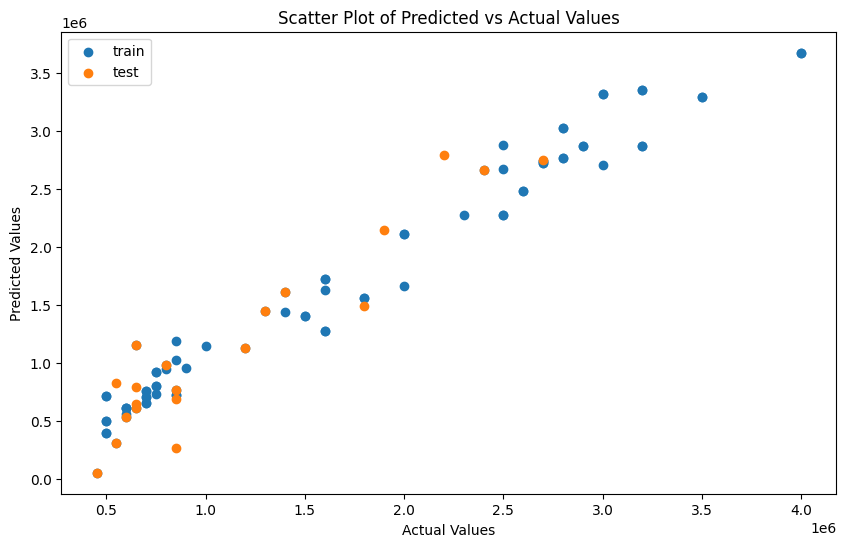

In [25]:
plt.figure(figsize=(10, 6))

plt.scatter(y_train, pred_train, label='train')
plt.scatter(y_test, pred_test, label='test')
plt.title('Scatter Plot of Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

Точки для train і test загалом розташовані вздовж висхідної діагоналі, тобто модель правильно вловлює загальну залежність: коли реальна ціна зростає, прогнозована також зростає.

**Завдання 7**. Ми хочемо проаналізувати як впливає кожен чинник на цілову змінну. Для цього давайте промасштабуємо наші дані.
1. Зробіть масштабування незалежних змінних використовуючи `StandardScaler`. Тренуємо на тренувальних даних, а на тестувальних лише викликаємо `transform`.

2. Натренуйте модель на відмасштабованих даних і перегляньте коефіцієнти моделі. Які колонки є найвпливовішими на формування передбачення з точки зору коефіцієнтів? Проаналізуйте напрям дії найважливіших коефіцієнтів. Чи це логічно з точки зору значення відповідних змінних, що вони впливають на цільову змінну саме в напрямі збільшення / зменшення?

In [26]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [27]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
model_st = LinearRegression()
model_st.fit(X_train_scaled, y_train)

LinearRegression()

In [29]:
pred_train_st = model_st.predict(X_train_scaled)
pred_test_st = model_st.predict(X_test_scaled)

rmse_train_st = np.sqrt(mean_squared_error(y_train, pred_train_st))
rmse_test_st = np.sqrt(mean_squared_error(y_test, pred_test_st))

print("RMSE train (scaled):", rmse_train_st)
print("RMSE test (scaled):", rmse_test_st)

RMSE train (scaled): 188933.70166317388
RMSE test (scaled): 285003.9557237926


In [30]:
coef_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": model_st.coef_[0]
}).sort_values(by="Coefficient", key=abs, ascending=False)

coef_df

,Feature,Coefficient
4,Power,563421.143949
6,Fuel_Type_Codes,-214750.184648
8,Brand_Audi,214409.103716
15,Brand_Mercedes,179018.839329
13,Brand_Mahindra,-169594.713673
9,Brand_BMW,165666.531145
12,Brand_Hyundai,-146778.957461
1,Kilometers_Driven,-118336.908628
2,Mileage,-113298.685881
14,Brand_Maruti,-106938.591526


In [31]:
coef_df.head(10)

,Feature,Coefficient
4,Power,563421.143949
6,Fuel_Type_Codes,-214750.184648
8,Brand_Audi,214409.103716
15,Brand_Mercedes,179018.839329
13,Brand_Mahindra,-169594.713673
9,Brand_BMW,165666.531145
12,Brand_Hyundai,-146778.957461
1,Kilometers_Driven,-118336.908628
2,Mileage,-113298.685881
14,Brand_Maruti,-106938.591526


З отриманих коефіцієнтів видно, що найбільший позитивний вплив на ціну має ознака Power (потужність автомобіля в кінських силах). Це означає, що зі збільшенням потужності модель прогнозує вищу ціну.
Далі за впливовістю йде Fuel_Type_Codes із негативним коефіцієнтом. У моєму кодуванні 1 = Petrol, 0 = Diesel, тому від’ємний знак означає, що бензинові автомобілі в середньому дешевші, а дизельні — дорожчі, тобто при переході до Diesel прогнозована ціна зростає.
Наступний суттєвий вплив мають ознаки бренду (One-Hot Encoding). Наприклад, Brand_Audi і Brand_Mercedes мають позитивні коефіцієнти, отже наявність цих брендів підвищує прогнозовану вартість. Водночас бренди на кшталт Brand_Mahindra, Brand_Hyundai, Brand_Maruti мають негативний коефіцієнт, тобто вони зменшують прогнозовану ціну відносно інших марок.
Також помітний негативний вплив мають Kilometers_Driven та Mileage:
більший пробіг → нижча ціна (логічно, авто зношується);
більша паливна ефективність (Mileage) → модель прогнозує нижчу ціну (у цьому датасеті це проявляється саме так).
✅ Важливий момент: раніше під час аналізу кореляції ми бачили, що ціна сильно пов’язана з Engine, Power, Mileage, Transmission_Codes (тобто вони мали |corr| > 0.5). Однак при аналізі коефіцієнтів регресії видно, що частина цих ознак має вже менші ваги (наприклад, Engine знаходиться нижче у списку). Це може пояснюватися тим, що в моделі одночасно присутні кілька взаємопов’язаних факторів (наприклад, Engine і Power), і вклад між ними “розподіляється”, тому коефіцієнт окремої змінної може зменшуватися навіть при помітній кореляції з ціною.

**Завдання 8.** На тих самих відмасштабованих даних натренуйте модель з `statsmodels`. Виведіть звіт і проаналізуйте p-value коефіцієнтів. Які ознаки є стат значущими на рівні значущості 0.05? Напишіть їх список.

In [32]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)

In [33]:
X_sm = sm.add_constant(X_train_scaled_df)
model = sm.OLS(y_train, X_sm).fit()

In [34]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     66.33
Date:                Wed, 21 Jan 2026   Prob (F-statistic):           2.50e-32
Time:                        12:41:15   Log-Likelihood:                -1085.4
No. Observations:                  80   AIC:                             2221.
Df Residuals:                      55   BIC:                             2280.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [35]:
coef_df_sm = pd.DataFrame({
    "Feature": model.pvalues.index,
    "p-value": model.pvalues.values
}).sort_values(by="p-value", ascending=True)

In [36]:
significant_features = coef_df_sm[coef_df_sm['p-value'] < 0.05]
significant_features

,Feature,p-value
0,const,4.867706e-54
5,Power,7.063767e-10
9,Brand_Audi,1.485122e-09
16,Brand_Mercedes,5.058355e-07
14,Brand_Mahindra,6.376087e-07
13,Brand_Hyundai,3.493692e-06
7,Fuel_Type_Codes,7.417688e-06
10,Brand_BMW,1.986440e-05
15,Brand_Maruti,2.310761e-04
19,Brand_Volkswagen,4.677495e-03


Модель OLS показала хорошу якість на тренувальних даних: коефіцієнт детермінації R² ≈ 0.97, що означає, що модель пояснює більшу частину варіації ціни автомобіля. Під час аналізу p-value видно, що ряд ознак є статистично значущими на рівні 0.05 (тобто мають p-value < 0.05). До них належать, зокрема, Power, Fuel_Type_Codes, Mileage, Kilometers_Driven та кілька dummy-змінних бренду (Audi, Mercedes, BMW тощо).
Ці ознаки можна вважати найбільш надійними кандидатами для використання в моделі, оскільки їхній вплив на ціну підтверджений статистично.

**Завдання 9**. Натренуйте лінійну регресію з `statsmodels` тільки на ознаках, які виявлись стат. значущими в попередньому завданні. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared?

In [37]:
selected_features = significant_features['Feature'][significant_features['Feature'] != 'const']
X_train_scaled_filtered = X_train_scaled_df[selected_features]

In [38]:
X_sm_filtered = sm.add_constant(X_train_scaled_filtered)
model_filt = sm.OLS(y_train, X_sm_filtered).fit()

In [39]:
print(model_filt.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     99.81
Date:                Wed, 21 Jan 2026   Prob (F-statistic):           7.46e-38
Time:                        12:41:15   Log-Likelihood:                -1103.9
No. Observations:                  80   AIC:                             2234.
Df Residuals:                      67   BIC:                             2265.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.68e+06   2.91e+0

Після відбору лише статистично значущих ознак R² зменшився, оскільки модель стала простішою й використовує менше пояснювальних змінних. R² зазвичай зростає при додаванні нових фіч і не штрафує за їх кількість, тому при видаленні колонок він може знижуватися навіть якщо частина з них мала високі p-value. Водночас Adjusted R² залишається високим, що підтверджує хорошу якість моделі на більш компактному наборі ознак.

**Завдання 10**. Натренуйте лінійну регресію з `statsmodels` на усіх ознаках з масштабованого `X_train`, у яких p_value в завданні 7 менше за `0.25`. Ми таким чином помʼякшили критерій відбору ознак. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared порівняно з завданням 7? Яку модель з останніх 3х завдань ви б лишили для використання?

In [40]:
pvals = model.pvalues.drop('const')
selected_features_pv = pvals[pvals < 0.25]
print(list(selected_features_pv))
print(len(list(selected_features_pv)))

[0.033549004824540006, 0.04923613752091413, 7.063766512428434e-10, 7.417688143802054e-06, 0.08737768081637771, 1.4851216622968137e-09, 1.9864397093531188e-05, 0.031774914732234275, 3.4936918220301576e-06, 6.376087387031859e-07, 0.00023107606470741822, 5.058354880032725e-07, 0.08682659878455506, 0.18221444585122562, 0.004677494615222192, 0.07964099563540072, 0.06956355357580833, 0.054345386555459264, 0.19032717602907878]
19


In [41]:
X_pv = sm.add_constant(X_train_scaled_df[selected_features_pv.index])
model_pv = sm.OLS(y_train, X_pv).fit()

In [42]:
print(model_pv.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     89.53
Date:                Wed, 21 Jan 2026   Prob (F-statistic):           7.25e-37
Time:                        12:42:25   Log-Likelihood:                -1086.2
No. Observations:                  80   AIC:                             2212.
Df Residuals:                      60   BIC:                             2260.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [43]:
print('Повна модель')
print('R2', model.rsquared)
print('Adj. R2', model.rsquared_adj)

Повна модель
R2 0.9666053642144243
Adj. R2 0.9520331595079913


In [45]:
print('Модель зі статистично значущими ознаками')
print('R2', model_filt.rsquared)
print('Adj. R2', model_filt.rsquared_adj)

Модель зі статистично значущими ознаками
R2 0.9470235628842322
Adj. R2 0.9375352457888708


In [44]:
print('Модель де значення p-value менше 0.25')
print('R2', model_pv.rsquared)
print('Adj. R', model_pv.rsquared_adj)

Модель де значення p-value менше 0.25
R2 0.9659286260980469
Adj. R 0.9551393576957617


Повна модель показала високі значення R² та Adj. R², але в summary були ознаки можливої мультиколінеарності, що ускладнює інтерпретацію коефіцієнтів. Модель тільки зі значущими ознаками (p < 0.05) стала простішою, однак її R² зменшився, оскільки частина пояснювальної інформації була втрачена разом із вилученими змінними.
Модель з критерієм p-value < 0.25 зберегла майже той самий рівень R², що й повна модель, але при цьому використовує менше ознак, тому є більш компактною та потенційно стабільнішою. Загалом усі три моделі показали хороші результати, але найбільш збалансованим варіантом є модель з p-value < 0.25, оскільки вона поєднує високу якість прогнозу та більш оптимальний набір ознак.